## 문제 유형에 따른 (은닉층, 출력층)활성화 함수 및 손실함수

지도학습
- 회귀 - "연속적인 값"
  > 은닉층 활성화 함수 : ```relu```  
  > 출력층 활성화 함수 : ```linear``` 혹은 쓰지 않음  
  > 손실함수 : ```mse ```

- 분류 - 범주형 값
 - 이진분류 : 남/여, 양성/음성, 정상/비정상, 합격/불합격 등
   > 은닉층 활성화 함수 : ```relu```  
   > 출력층 활성화 함수 : ```sigmoid```  
   > 손실함수 : ```binary_crossentropy```

 - 다중분류 : 개/고양이/코끼리
   > 은닉층 활성화 함수 : ```relu```  
   > 출력층 활성화 함수 : ```softmax```  
   > 손실함수 : ```categorical_crossentropy```, ```sparse_categorical_crossentropy```  


# 회귀 모델의 개발

## Keras로 보스톤 집값 예측 모델 개발(단일 레이어)

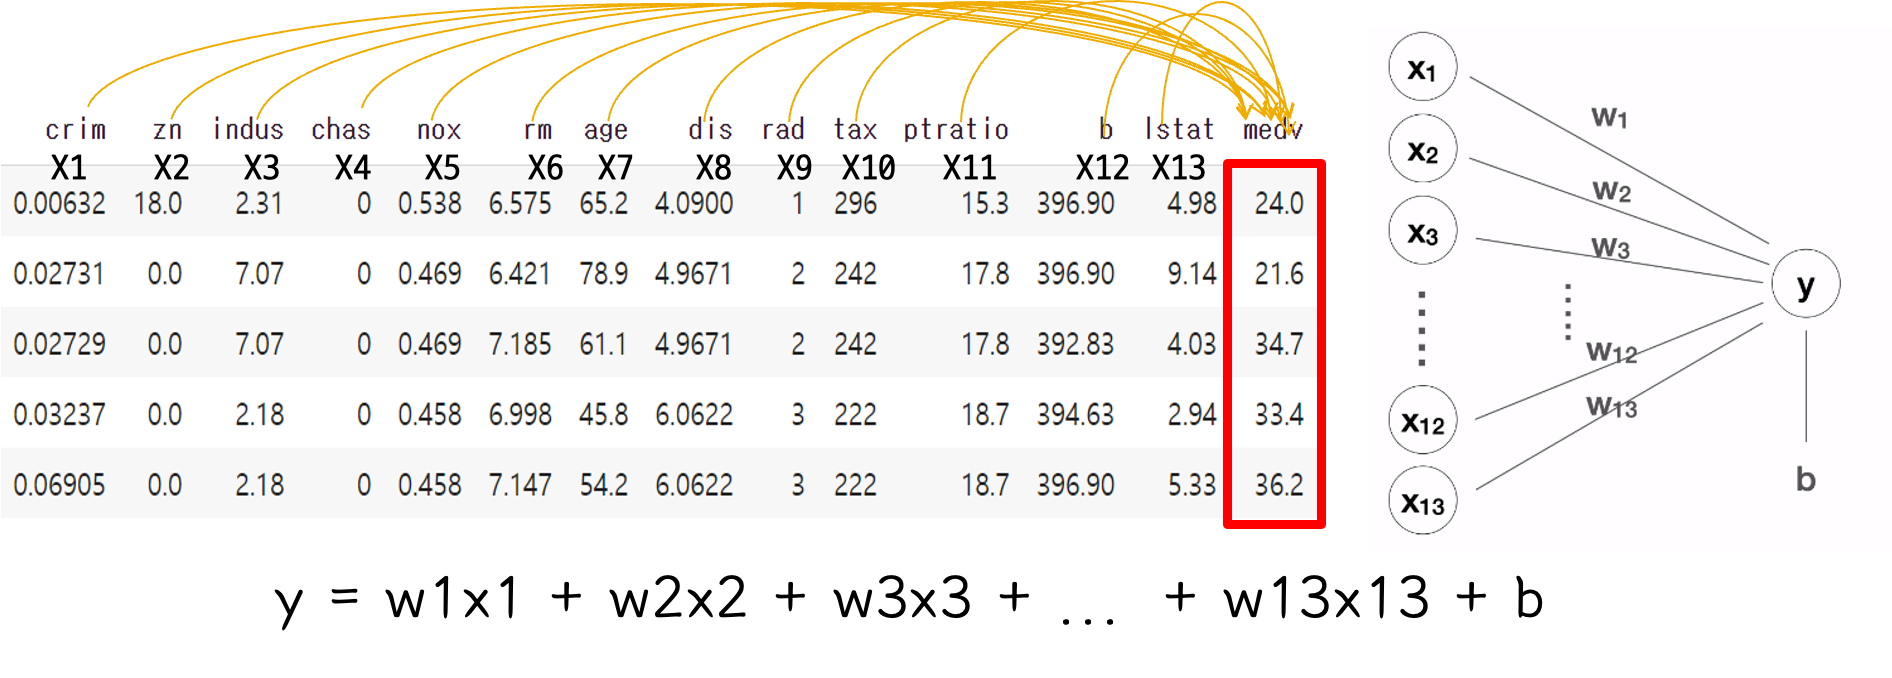

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras

# 1. 데이터를 준비한다.
df = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv")

X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
Y = df['medv']


# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(13, )))
model.add(keras.layers.Dense(1))

# 3. 모델의 학습을 설정한다.
model.compile(loss='mse', optimizer='adam')

In [ ]:
# 4. 모델을 학습시킨다.
model.fit(X, Y, epochs=100)

## Keras로 보스톤 집값 예측 모델 개발(다층 레이어)

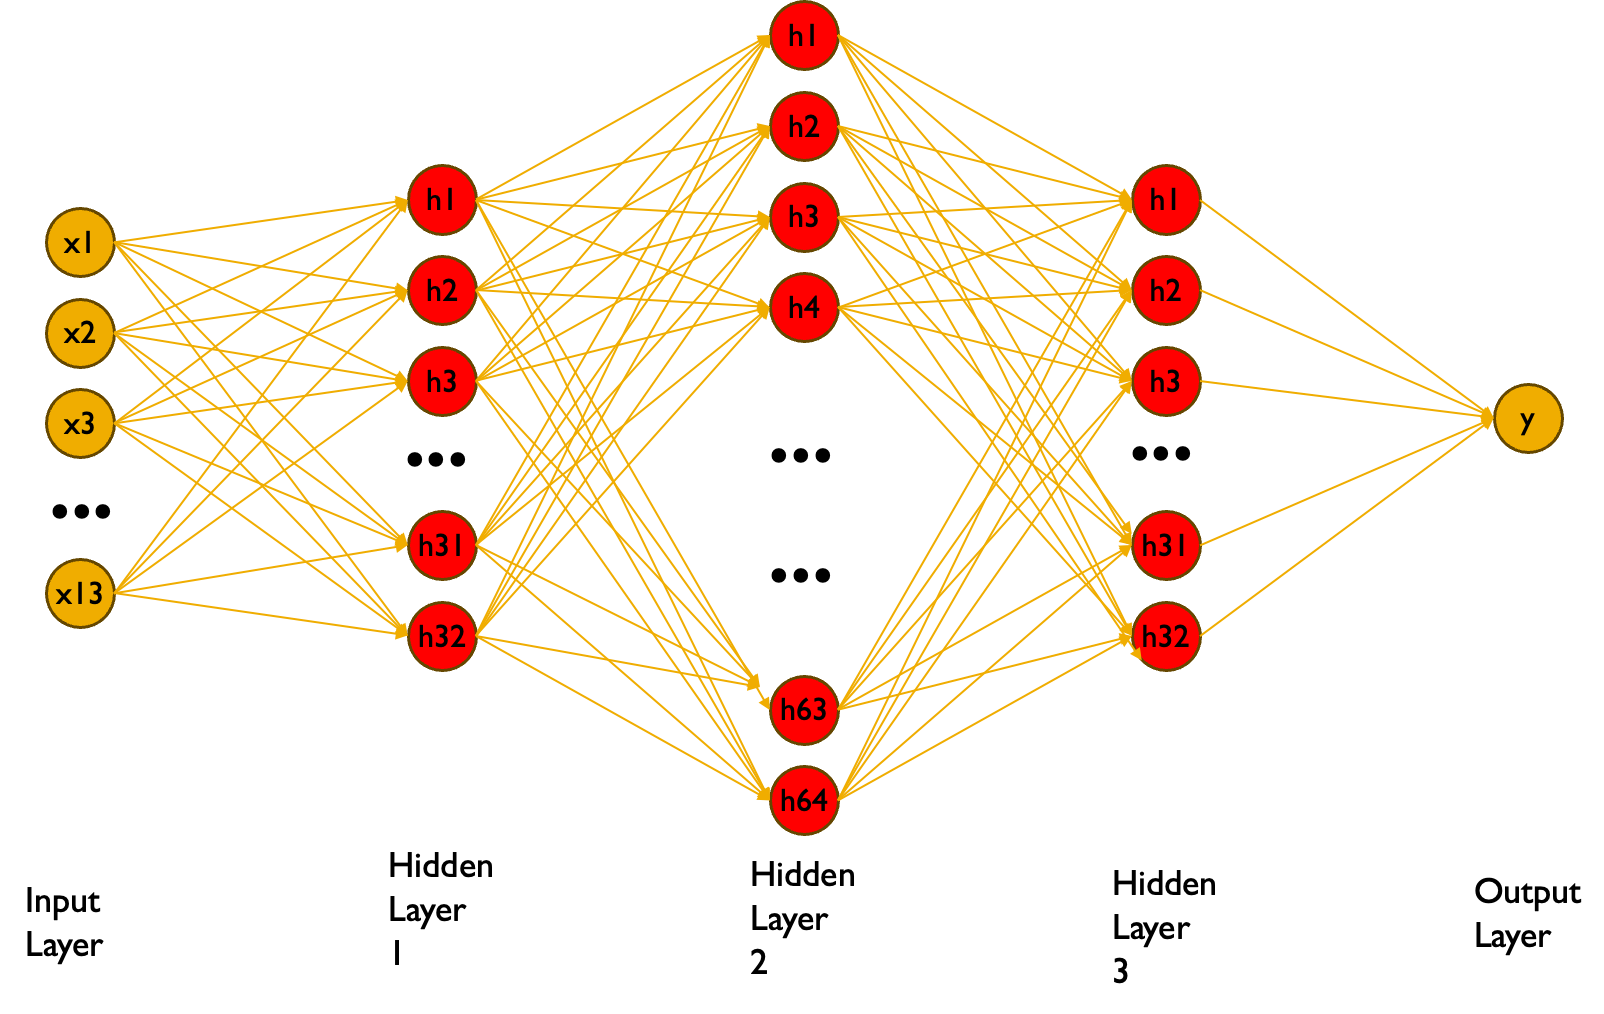

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras

# 1. 데이터를 준비한다.
df = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/boston.csv")

X = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']]
Y = df['medv']

# 2. 모델의 구조를 설계한다.
model = keras.Sequential()

model.add(keras.layers.Input(shape=(13, )))        # 입력층

model.add(keras.layers.Dense(32, activation='relu')) # 은닉층1
model.add(keras.layers.Dense(64, activation='relu')) # 은닉층2
model.add(keras.layers.Dense(32, activation='relu')) # 은닉층3

model.add(keras.layers.Dense(1)) # 출력층

# 3. 모델의 학습을 설정한다.
model.compile(loss='mse', optimizer='adam')

In [ ]:
# 4. 모델을 학습시킨다.
model.fit(X, Y, epochs=100)

# 이진 분류 모델의 개발

## 분류모델 : 와인의 종류 예측(화이트와인 or 레드와인)

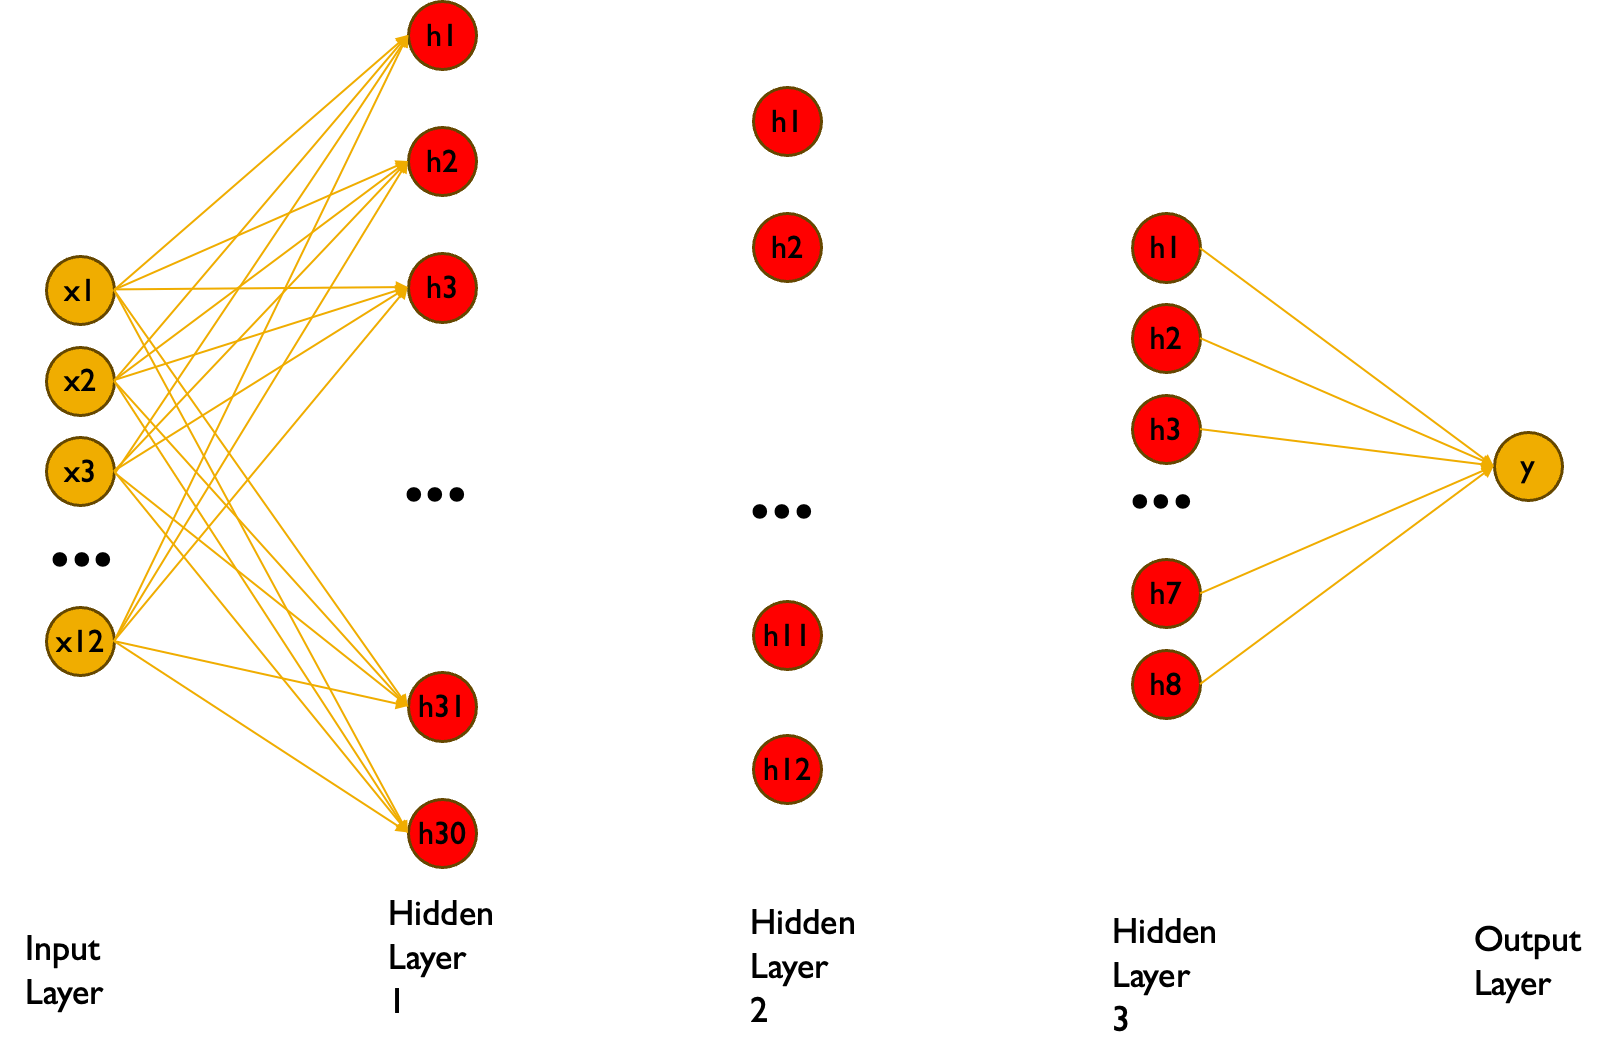

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras

# 1. 데이터를 준비한다.
wine = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/wine_header.csv")

X = wine[['주석산_농도', '아세트산_농도', '구연산_농도', '잔류당분_농도', '염화나트륨_농도', '유리아황산_농도', '총_아황산_농도', '밀도', 'pH', '황산칼륨_농도', '알코올_도수', '와인맛_등급']]
Y = wine['종류(0W1R)']

# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(12, )))
model.add(keras.layers.Dense(30, activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 3. 모델의 학습을 설정한다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 4. 모델을 학습시킨다.
hist = model.fit(X, Y, epochs=100)

Epoch 1/100
204/204 [==============================] - 3s 4ms/step - loss: 0.2532 - accuracy: 0.9206
Epoch 2/100
204/204 [==============================] - 1s 6ms/step - loss: 0.1931 - accuracy: 0.9317
Epoch 3/100
204/204 [==============================] - 1s 5ms/step - loss: 0.1750 - accuracy: 0.9400
Epoch 4/100
204/204 [==============================] - 1s 4ms/step - loss: 0.1547 - accuracy: 0.9429
Epoch 5/100
204/204 [==============================] - 1s 4ms/step - loss: 0.1351 - accuracy: 0.9532
Epoch 6/100
204/204 [==============================] - 1s 4ms/step - loss: 0.1157 - accuracy: 0.9597
Epoch 7/100
204/204 [==============================] - 1s 4ms/step - loss: 0.1085 - accuracy: 0.9628
Epoch 8/100
204/204 [==============================] - 1s 4ms/step - loss: 0.0972 - accuracy: 0.9664
Epoch 9/100
204/204 [==============================] - 1s 4ms/step - loss: 0.1025 - accuracy: 0.9666
Epoch 10/100
204/204 [==============================] - 1s 4ms/step - loss: 0.0846 - accura

# 다중 분류 모델의 개발

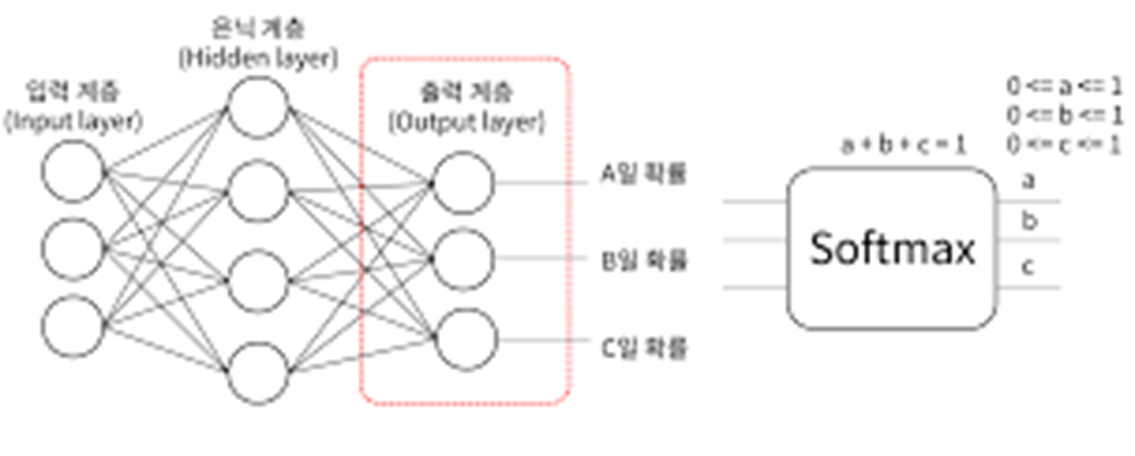

## 분류모델 : 붓꽃의 품종(setosa or versicolor or virginica)

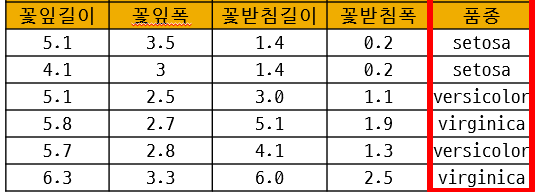

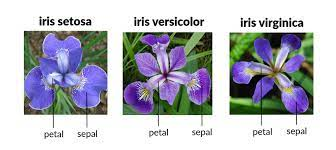

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras

# 1. 데이터를 준비한다.
iris = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/iris.csv")

In [ ]:
iris

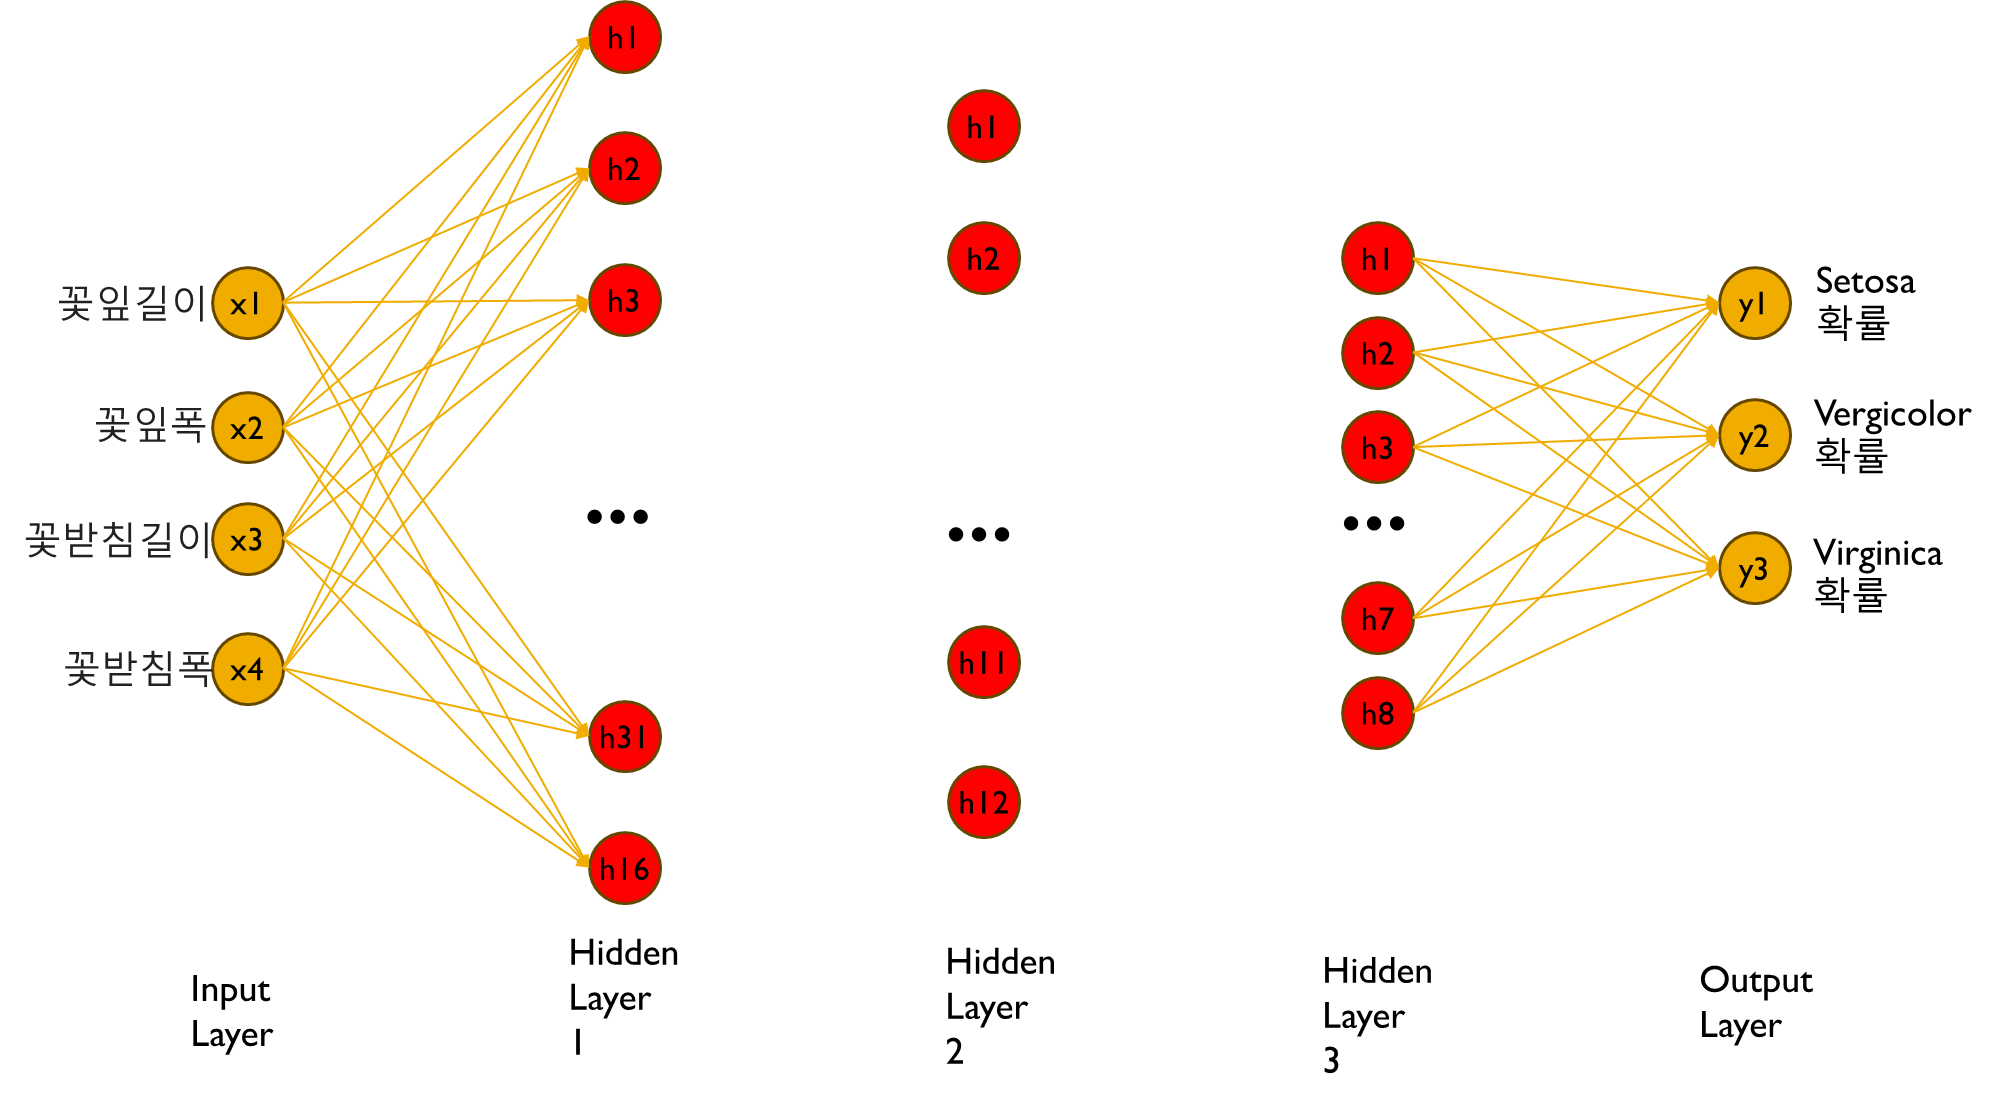

In [ ]:
# 모든 컬럼 확인해 보기
iris.columns

In [ ]:
# 독립변수와 종속변수로 나누기
X = ???
Y = ???

In [ ]:
# 종속변수 확인해 보기
Y

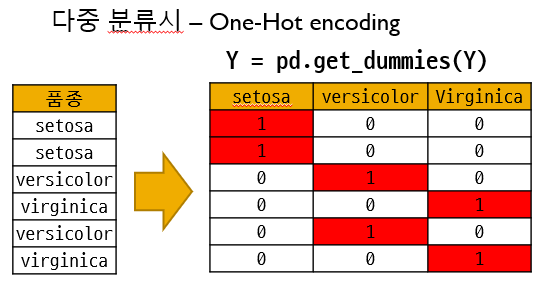

In [ ]:
# pandas를 활요한 one-hot 인코딩
Y = pd.get_dummies(Y)

훈련데이터 : 평가 데이터 = 80% : 20%

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(전체 독립변수 이름이 뭐여?, 전체 종속변수 이름이 뭐여?, test_size=훈련데이터를 몇%로 할래?, shuffle=섞을래?)

In [ ]:
print(f"전체데이터(100%)  X : {X.shape}건, Y : {Y.shape}건")
print(f"훈련데이터(80%)  X : {train_X.shape}건, Y : {train_Y.shape}건")
print(f"평가데이터(20%)  X : {test_X.shape}건, Y : {test_Y.shape}건")

전체데이터(100%)  X : (150, 4)건, Y : (150, 3)건
훈련데이터(80%)  X : (120, 4)건, Y : (120, 3)건
평가데이터(20%)  X : (30, 4)건, Y : (30, 3)건


In [ ]:
# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(??, )))
model.add(keras.layers.Dense(?? activation='relu'))
model.add(keras.layers.Dense(??, activation='relu'))
model.add(keras.layers.Dense(??, activation='relu'))
model.add(keras.layers.Dense(??, activation='?????'))

In [ ]:
# 3. 모델의 학습을 설정한다.
model.compile(loss='???', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 4. 모델을 학습시킨다.
hist = model.fit(X, Y, epochs=200, validation_split=0.2)

In [ ]:
# 평가용 데이터로 품종 맞춰 보기(0 ~ 4번 데이터)

???

In [ ]:
# 실제 정답 보기(0 ~ 4번 데이터)

???

In [ ]:
# 평가해 보기

???

### 전체 코드 정리

In [ ]:
# 0. 필요한 모듈을 import한다.
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split


# 1. 데이터를 준비한다.
iris = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI/main/dataset/iris.csv")

# 1-1. 독립변수와 종속변수로 분리
X = iris[['꽃잎길이', '꽃잎폭', '꽃받침길이', '꽃받침폭']]
Y = iris['품종']

# 1-2. 종속변수에 대해 one-hot 인코딩(다중 분류) #################################################################
Y = pd.get_dummies(Y)

# 1-3. 훈련용(train) 데이터와 평가용(test) 데이터를 80% : 20 %로 분리 ############################################
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, shuffle=True)


# 2. 모델의 구조를 설계한다.
model = keras.Sequential()
model.add(keras.layers.Input(shape=(4, )))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(12, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# 3. 모델의 학습을 설정한다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. 모델을 학습시킨다.
hist = model.fit(X, Y, epochs=200, validation_split=0.2)

# 파이썬 객체지향 프로그래밍 기법(OOP : Object-Oriented Programming)

- 객체지향프로그래밍(객체 : 값(속성), 기능(메서드 함수))

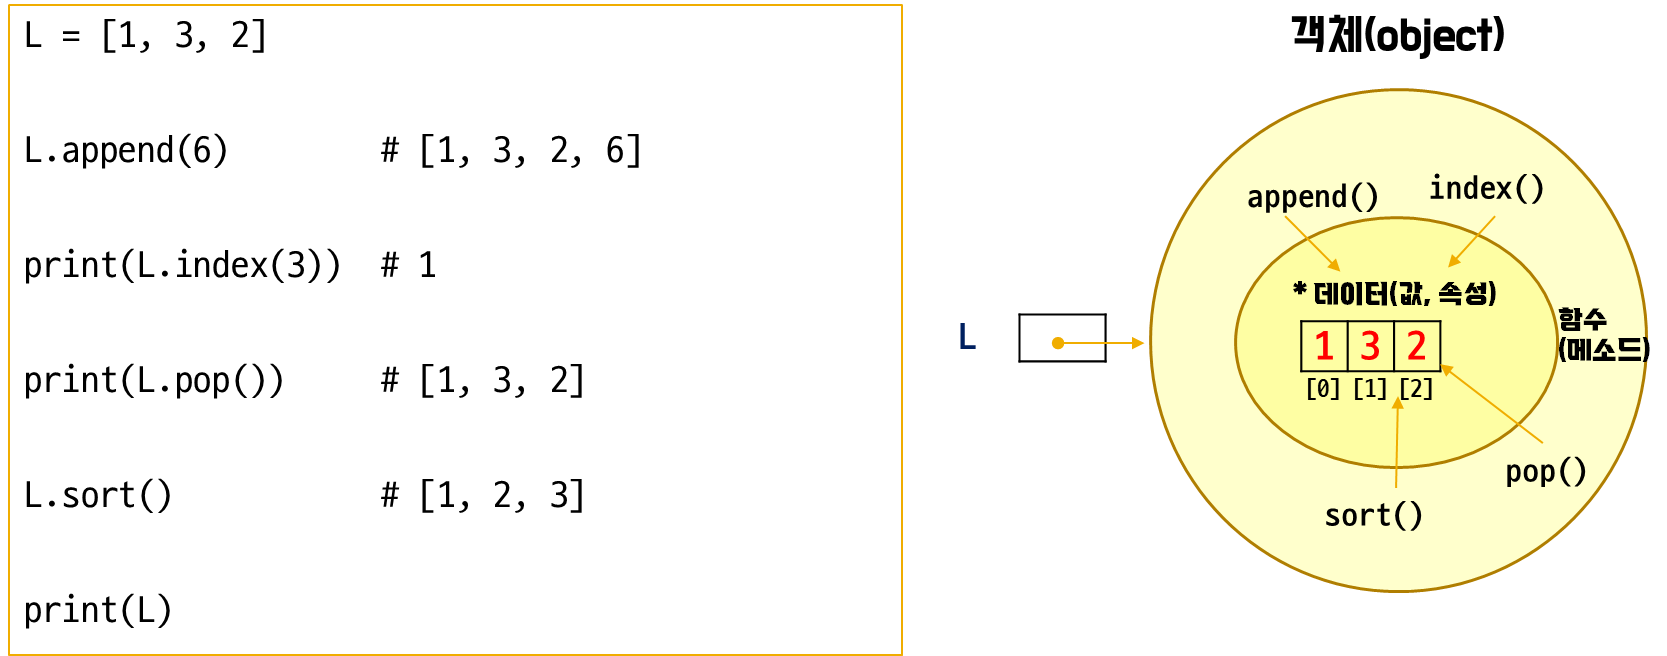

In [ ]:
class Student :
    def __init__(self):
        self.name = ""
        self.hp = 0
        #print("객체 생성")

    def walking(self):
        # 걷기를 하면 hp가 10 증가
        print(f"{self.name}님이 걷기 운동을 해서 hp가 {self.hp}이 됨.")


    def running(self):
        # 뛰기를 하면 hp가 10 증가
        print(f"{self.name}님이 뛰기 운동을 해서 hp가 {self.hp}이 됨.")

hong = Student()
lee = Student()

hong.name = "홍길동"
lee.name = "이영희"

In [ ]:
# hong 객체의 running() 메서드 실행



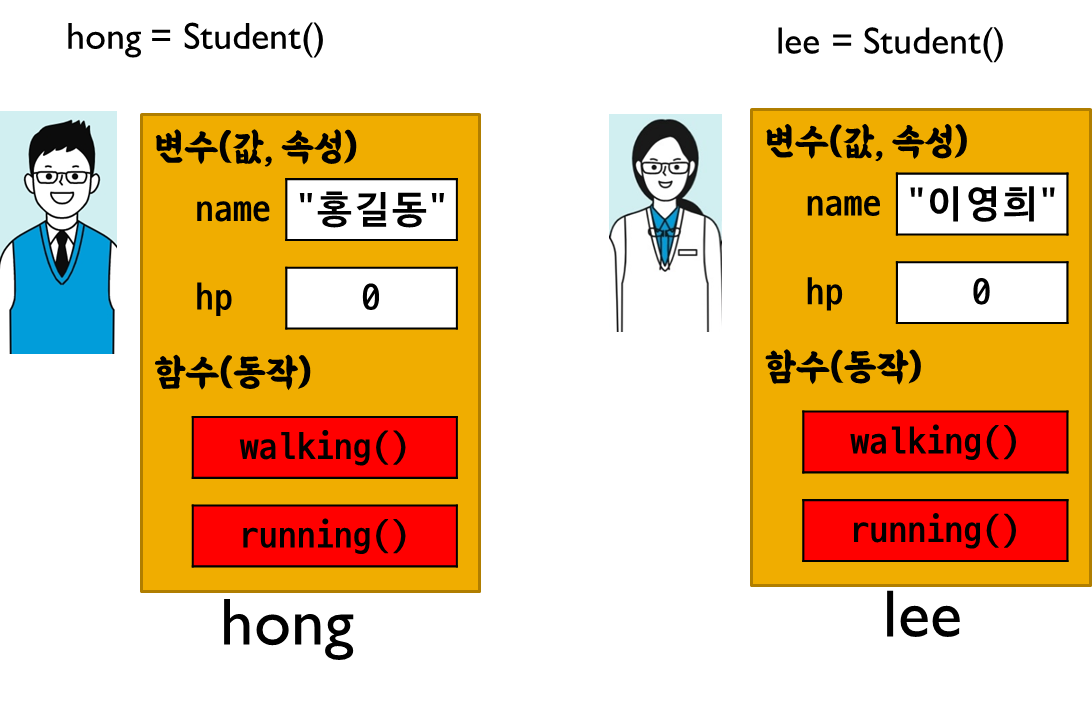